## Выявление определяющих успешность игры закономерностей

«Стримчик» - интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). За 2016 год данные могут быть неполными. Нам предстоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

⚠️ **Важное примечание:** В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** — тщательно проанализировать имеющиеся данные и выявить определяющие успешность игры закономертности. 

**Ход исследования:**

Все необходимые данные получим из файла `games.csv`. Нам понадобится для начала обзор данных, так как сейчас нет информации об их качестве. Поискать ошибки и пропуски, а также привести данные к нужному типу, если понадобится. Выясним, нужны ли какие-то расчеты, которые помогут в процессе исследования и в проверке гипотез. Затем займемся непосредственно исследовательским анализом данных, составлением портрета пользователя определенных регионов и проверкой гипотез. В итоге сделаем вывод, который подытожит цель исследования. 
 
Таким образом, анализ пройдёт в шесть шагов:
 1. Изучение данных из файла.
 2. Предобработка и подготовка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез. 
 6. Общий вывод.

Импортируем сразу же нужные библиотеки, затем в процессе добавим другие здесь же, если будет такая необходимость:

In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

### 1. Изучение данных из файла

Начнем исследование с загрузки файла и ознакомлением с данными. 

Прочитаем файл `games.csv` из папки `/datasets`, сохранив его в переменной `games`:

In [2]:
games = pd.read_csv('/datasets/games.csv')

Выведем на экран случайные пятнадцать строк таблицы, чтобы взглянуть на данные впервые и сразу в различных местах. Для этого вызовем функцию `sample` и укажем значение 15:

In [3]:
games.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4764,Just Dance Kids 2,X360,2011.0,Misc,0.29,0.08,0.00,0.03,NaN,tbd,E
9191,Frank Thomas Big Hurt Baseball,PS,1996.0,Sports,0.08,0.05,0.00,0.01,NaN,NaN,NaN
10551,Freaky Flyers,PS2,2003.0,Racing,0.05,0.04,0.00,0.01,66.0,tbd,T
7818,The Polar Express,GBA,2004.0,Adventure,0.14,0.05,0.00,0.00,NaN,tbd,E
8034,Ninja Gaiden 3,WiiU,2012.0,Action,0.14,0.03,0.00,0.02,NaN,NaN,NaN
11054,Ratchet & Clank Future: Quest for Booty,PS3,2008.0,Platform,0.01,0.06,0.00,0.02,NaN,NaN,NaN
5530,Teen Titans,GC,2006.0,Action,0.25,0.07,0.00,0.01,63.0,6.9,E10+
5890,Stranglehold,PS3,2007.0,Shooter,0.24,0.02,0.00,0.03,77.0,7.9,M
15739,Aqua Panic!,DS,2009.0,Puzzle,0.01,0.01,0.00,0.00,NaN,NaN,NaN
415,Professor Layton and the Unwound Future,DS,2008.0,Puzzle,0.60,1.57,0.82,0.27,86.0,9.2,E10+


Теперь познакомимся с данными таблицы при помощи вызова `info`. В том числе посмотрим типы данных, количество столбцов и на количество пропущенных значений. Выше мы убедились по случайным строкам таблицы, что пропущенные значения есть:

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Файл содержит 16 715 строчек. Всего в таблице 11 столбцов: 7 с количественными значениями и 4 с категориальными. Тип данных соответственно различается. Есть `float` и `object`. Согласно документации к данным:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию


Сразу же:

- изучим список характерных значений по таблице:

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- проверим уникальные значения и количество их упоминаний в столбце `Name`:

In [6]:
games['Name'].value_counts()

Need for Speed: Most Wanted           12
Madden NFL 07                          9
FIFA 14                                9
Ratatouille                            9
LEGO Marvel Super Heroes               9
                                      ..
Dollar Dash                            1
Puella Magi Madoka Magica Portable     1
World in Conflict                      1
Kameo: Elements of Power               1
Super Mario 3D World                   1
Name: Name, Length: 11559, dtype: int64

- выявим причины того, что в столбце некоторые игры появляются несколько раз, взяв за пример игру с самым большим количеством упоминаний:

In [7]:
games[games['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Игра повторяется, так как ее выпускали на разных платформах. Есть момент, что ее выпустили дважды в 2005 и 2012 годах на `X360` и `PC`, это связано с тем, что в 2012 году Criterion Games разработали перезапуск этой версии игры. 

- проверим количество пропусков:

In [8]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

- проверим наличие явных дубликатов:

In [9]:
games.duplicated().sum()

0

По итогу: 
- в названиях колонок не соблюден «змеиный_регистр», поэтому будем заменять, но само название колонок соответствует их описанию в соответствии с документацией;
- в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating` есть пропуски;
- в столбце `User_Score` есть значение `tbd`, что в геймдеве расшифровывается очень просто - to be determined, то есть "будет определено". Это нормально, ведь игра могла только выйти и оценок недостаточно для отображения среднего значения;
- в столбцах `Year_of_Release` и `Critic_Score` необходимо заменить тип данных на целочисленный, так как значения в данных столбцах не имеют дробной части;
- в столбцe `User_Score` необходимо заменить тип данных на `float`;
- некоторые игры в таблице повторяются, так как в ней информация по разным платформам. То есть, одна и та же игра могла быть выпущена в один и тот же год на разных платформах, поэтому будет несколько строк с нею, и это касается естественно тех случаев, когда игра выпускалась в разные года на разных платформах;
- явных дубликатов нет;
- в целом каких-то аномальных и некорректных значений на первый взгляд не видно. Есть, конечно, нулевые значения во всех столбцах по показателям продаж, но это может быть связано с тем, что какую-то игру могли продавать лишь в одном/двух регионах.

**Вывод:**

В таблице — различные данные по играм за несколько лет c 1980 года и вплоть до 2016 года. У нас есть название игр, платформ, жанров, года выпуска, данные по продажам и оценкам. 

Предварительно можем утверждать, что данных достаточно для проведения исследования, однако нужно исправить названия столбцов, поработать с пропусками и привести значения к правильному типу данных в выявленных столбцах. Вероятно, что неправильный тип данных связан с проблемами при выгрузке данных, либо из-за несовместимости какой-то архитектурной составляющей из предыдущей программы, где выгружали данные. Это не похоже на человеческий фактор.

Обработаем все замеченные недочеты, затем приступим к расчетам, непосредственно к самому исследованию и проверке гипотез.

### 2. Предобработка и подготовка данных

Начнем предобработку данных и их подготовку к исследованию. Заменим названия столбцов и приведем их к «змеиному_регистру». Посмотрим на пропуски и при необходимости обработаем их. Преобразуем данные в нужные типы в тех столбцах, где это необходимо. В заключении этого шага произведем расчет суммарных продаж во всех регионах и запишем их в отдельный столбец. 

#### 2.1 Исправление ошибок в данных

Заменим названия столбцов и приведем их к «змеиному_регистру» и сразу же проверим результат:

In [10]:
games.columns = games.columns.str.lower()
games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
620,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,1.84,0.56,0.0,0.09,NaN,NaN,NaN


В столбцах с категориальными значениями посмотрим на уникальные. За исключением столбца `name`, так как с ним ранее поработали:

In [11]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В целом по платформам и жанрам все в порядке, а вот в категориях рейтинга есть нюансы. Мы ознакомились со списком категорий. Обратим внимание на `K-A` и `RP`. Первого сейчас вообще не существует, он расшифровывается как Kids to Adults и использовался раньше, теперь это `E` в современной ESRB. Второй означает, что игра была отправлена в ESRB и ожидает присвоения рейтинга. Его используют только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Посмотрим, много ли игр с этими рейтингами:

In [14]:
games[games['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [15]:
games[games['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Всего лишь 6 игр из всей таблицы. `K-A` заменим на `E`, как и полагается, а `RP` на `NaN`:

In [16]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = np.nan

Займемся пропусками в таблице:

- в столбцах `name` и `genre`:

In [17]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В обоих столбцах по два пропуска и они находятся на одних строках. Удалим обе строки, так как на результаты исследования это не повлияет:

In [19]:
games.drop([659, 14244], axis = 0, inplace=True)

- в столбце `year_of_release` мало пропусков, при этом заменить их каким-то средним или медианным значением нельзя, а вносить данные по каждой игре руками нецелесообразно. Удалим их, так как их менее 5% от общего количества в таблице, на результат исследования это не повлияет:

In [20]:
games.dropna(subset = ['year_of_release'], inplace = True)

- в столбцах `critic_score`, `user_score` и `rating` нам нечем заменить пропуски, а так как это исследование не чувствительно к пропускам и отсутствие вмешательства в них на результаты не повлияет, трогать их не будем.

Теперь займемся заменой типов данных:

- в столбце `year_of_release` просто сделаем целочисленный тип данных, так как в их значениях нет дробной части:

In [21]:
games['year_of_release'] = games['year_of_release'].astype('int64')

- в столбце `critic_score` сделаем тоже самое, только здесь `Int64` напишем с большой буквы, чтобы в смене типа данных не помешали пропущенные значения:

In [22]:
games['critic_score'] = games['critic_score'].astype('Int64')

- в столбце `user_score` заменим тип данных на `float`, так как в значениях есть дробные части. Но сначала значения `tbd` переведем в `NaN`, так как до этого выяснили, что все равно такой информации в принципе нет и не будет:

In [23]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float64')

В итоге у нас останутся пропуски только в тех столбцах, в которых мы их трогать и не будем. В остальном все в порядке:

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9767 non-null object
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:**

Ранее выяснили, что неправильный тип данных и некоторые пропуски могли быть связаны с проблемами при выгрузке данных, либо из-за несовместимости какой-то архитектурной составляющей из предыдущей программы, где выгружали данные. По каким-то играм, возможно, в принципе были не все данные. 

#### 2.2 Расчет суммарных продаж по регионам

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Изменим порядок столбцов, чтобы с данными было удобнее работать после добавления нового:

In [26]:
games = games[['name', 'year_of_release', 'platform',
               'genre', 'na_sales', 'eu_sales',
               'jp_sales', 'other_sales', 'total_sales', 'critic_score',
               'user_score', 'rating']]

Убедимся в том, что все сделали правильно и посмотрим на случайную выборку пяти строк:

In [27]:
games.sample(5)

,name,year_of_release,platform,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
7158,LEGO The Hobbit,2014,WiiU,Action,0.09,0.11,0.00,0.02,0.22,NaN,7.8,E10+
14183,Diabolik Lovers: Dark Fate,2015,PSV,Action,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN
11536,Ice Age 2: The Meltdown,2006,Wii,Platform,0.06,0.01,0.00,0.01,0.08,66,7.8,E10+
8656,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,2008,PSP,Strategy,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN
12483,Kekkon: Marriage,1995,SAT,Adventure,0.00,0.00,0.06,0.00,0.06,NaN,NaN,NaN


**Вывод:**

Путем сложения значений по всем регионам выяснили общий объем продаж и записали его в отдельный столбец, чтобы использовать эти показатели в исследовании. Заменили для удобства порядок столбцов, а также путем вывода таблицы убедились в том, что все сделали правильно.  

**Вывод по шагу:**

Мы исправили недочеты в данных, которые могли помешать исследованию. Заменили названия столбцов, приведя их к «змеиному_регистру». Выявили неактуальную возрастную категорию и заменили ее на актуальную, а также удалили небольшое количество пропусков, которые на само исследование никак не повлияют. В трех столбцах пропуска пришлось оставить, так как это нам никак не помешает, а прочая информация в строках с пропусками нам понадобится. Заменили типы данных на правильные, где это было нужно.

Вычислили общий объем продаж, собрав информацию по всем регионам и добавили эти значения в отдельный столбец. Общий объем продаж нам обязательно понадобится во время исследования. 

### 3. Исследовательский анализ данных

Теперь займемся исследовательским анализом данных. Работа будет объемной, нам потребуется:
- посмотреть, сколько игр выпускалось в разные годы и выяснить, важны ли данные за все периоды;
- посмотреть, как менялись продажи по платформам и выбрать платформы с наибольшими суммарными продажами, затем построить распределение по годам. Выяснить, за какой характерный срок появляются новые и исчезают старые платформы;
- определить актуальный период в результате исследования предыдущих пунктов, который поможет построить прогноз на 2017 год. Учитывать данные за предыдущие годы не будем, то есть вывод и прогноз будем делать по найденному актуальному периоду;
- выяснить, какие платформы лидируют по продажам, растут и падают, затем выбрать несколько потенциально прибыльных платформ;
- построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат увиденного;
- посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, затем построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами, сформулировать выводы;
- соотнести выводы с продажами игр на других платформах;
- посмотреть на общее распределение игр по жанрам, затем сделать вывод о самых прибыльных жанрах и выяснить, выделяются ли жанры с высокими и низкими продажами.

Будем двигаться по порядку:

- **посмотрим, сколько игр выпускалось в разные годы и выясним, важны ли данные за все периоды**

Посмотрим на количество выпущенных игр в разные годы:

In [28]:
years_total = pd.pivot_table(games, index = 'year_of_release', values = 'name', aggfunc = 'count')
years_total.columns = ['games_count']
years_total

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Теперь построим график, по которому будет понятнее картина:

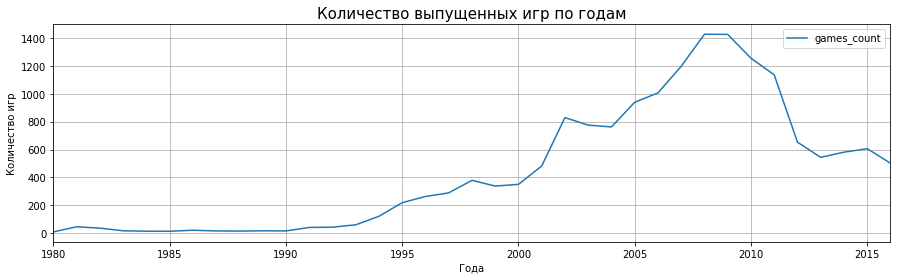

In [29]:
years_total.plot(figsize = (15, 4))
plt.title('Количество выпущенных игр по годам', fontsize = 15)
plt.xlabel('Года', fontsize = 10)
plt.ylabel('Количество игр', fontsize = 10)
plt.grid(True)
plt.show()

Видим, что с каждым годом растет количество выпускаемых игр из-за улучшения технологий и спроса на них, но после 2009 идет спад, видимо из-за перенасыщенности рынка и разработки мобильных игр, в 2009 был пик. Также это может быть связано с бОльшими требованиями к играм, качественные стали делать дольше. 

Нет смысла брать данные по всем периодам, ибо в первое время игр было очень мало, какие-то платформы и компании уже канули в Лету. По случайной выборке мы видели, что данные не только за 2016 год имеют пропуски, поэтому откидывать его не будем. Для нас будут интересными года с 2013 по 2016, так как индустрия игр развивается быстро, большой период брать не будем. 

- **посмотрим, как менялись продажи по платформам и выберем платформы с наибольшими суммарными продажами, построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы**

Построим таблицу с продажами по годам:

In [30]:
sales_years = pd.pivot_table(games, index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
sales_years.columns = ['sum']
sales_years

,sum
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70
1988,47.21


А теперь график:

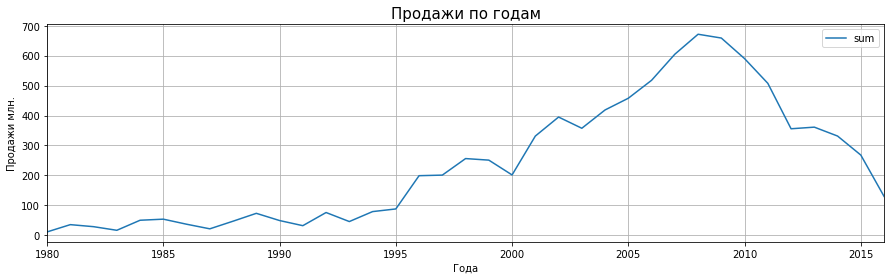

In [31]:
sales_years.plot(figsize = (15, 4))
plt.title('Продажи по годам', fontsize = 15)
plt.xlabel('Года', fontsize = 10)
plt.ylabel('Продажи млн.', fontsize = 10)
plt.grid(True)
plt.show()

Создадим таблицу с продажами по платформам:

In [32]:
sales_platform = pd.pivot_table(games, index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

И сразу построим наглядный график, но сделаем его побольше из-за количества платформ:

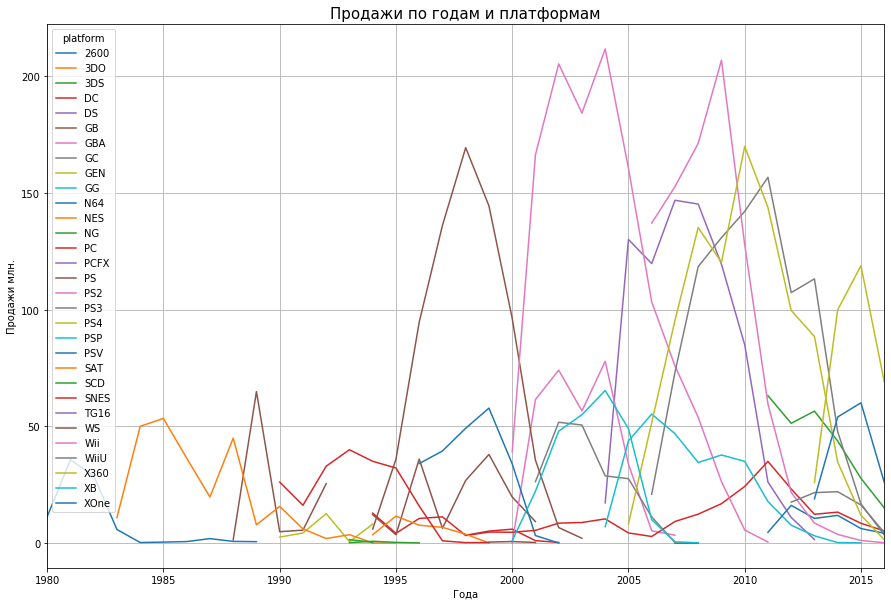

In [33]:
sales_platform.plot(figsize = (15, 10))
plt.title('Продажи по годам и платформам', fontsize = 15)
plt.xlabel('Года', fontsize = 10)
plt.ylabel('Продажи млн.', fontsize = 10)
plt.grid(True)
plt.show()

Похоже на то, что в среднем платформы живут 10 лет. 

Посмотрим на 10 платформ с наибольшим количеством продаж:

In [34]:
top_sales_platform = pd.pivot_table(games, index = 'platform', values = 'total_sales', aggfunc = 'sum')
top_sales_platform.sort_values(by = 'total_sales', ascending = False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Создадим таблицу, в которую закинем только 6 платформ, наиболее подходящих для анализа, которые еще живы. Всего продажи в 2016 году были у этих платформ `XOne`, `X360`, `WiiU`, `Wii`, `PSV`, `PS4`, `PS3`, `PC` и `3DS`. Из них лишние:
- `X360` перестали поддерживать в 2016 году;
- `Wii` перестали поддерживать в 2013 году;
- `PS3` к 2016 году перестали поддерживать во многих странах, также уже есть более свежая `PS4` на тот момент.

В связи с этим, будем анализировать 6 следующих платформ: `XOne`, `WiiU`, `PSV`, `PS4`, `PC` и `3DS`:

In [35]:
actual_games = (games[((games['platform'] == 'XOne') | (games['platform'] == 'WiiU') | (games['platform'] == 'PSV') 
               | (games['platform'] == 'PS4') | (games['platform'] == 'PC') | (games['platform'] == '3DS'))])

И отсортируем их по объемам продаж:

In [36]:
top_actual_games_sales = pd.pivot_table(actual_games, index = 'platform', values = 'total_sales', aggfunc = 'sum')
top_actual_games_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,314.14
3DS,257.81
PC,255.76
XOne,159.32
WiiU,82.19
PSV,53.81


PS4 лидирует, но Японцы идут следом, затем несменный персональный компьютер, который, судя по всему, будет в почете всегда!

Построим график, чтобы посмотреть на продажи по этим платформам по годам:

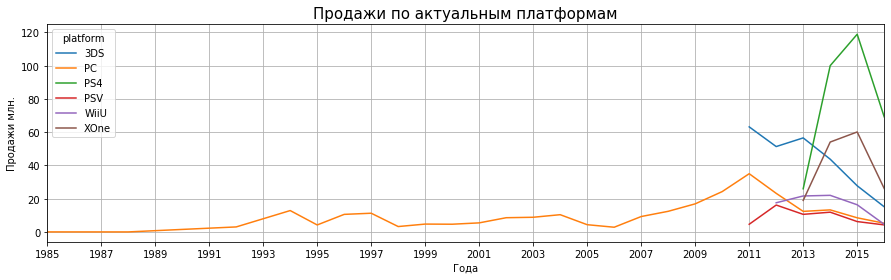

In [37]:
pd.pivot_table(actual_games, index = 'year_of_release', columns
               = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 4))
plt.title('Продажи по актуальным платформам', fontsize = 15)
plt.xlabel('Года', fontsize = 10)
plt.ylabel('Продажи млн.', fontsize = 10)
plt.xticks(np.arange(start = 1985, stop = 2016, step = 2))
plt.grid(True)
plt.show()

На графике видно, что `PC` живет с момента своего создания и будет жить скорее всего еще очень долго, если не всегда. У каждой платформы был пик продаж в определенном году, но затем падение, даже у тех, которые все еще пользуются популярностью. 

- **определим актуальный период в результате исследования предыдущих пунктов, который поможет построить прогноз на 2017 год. Учитывать данные за предыдущие годы не будем, то есть дальнейшие выводы и прогнозы будем делать по найденному актуальному периоду**

При работе с первым пунктом определили наилучший период с 2013 по 2016, его и возьмем за актуальный для построения прогноза. Если в среднем платформы живут по 10 лет, то этот период захватит большинство популярных платформ, которые вероятнее всего еще будут жить в 2017, а у каких-то еще будет большая популярность:

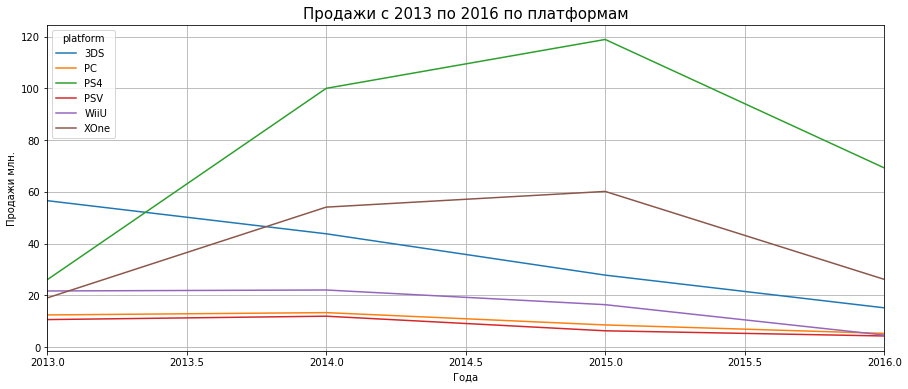

In [38]:
actual_games_sales = (actual_games[actual_games['year_of_release'] >= 2013])
pd.pivot_table(actual_games_sales, index = 'year_of_release', columns
               = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 6))
plt.title('Продажи с 2013 по 2016 по платформам', fontsize = 15)
plt.xlabel('Года', fontsize = 10)
plt.ylabel('Продажи млн.', fontsize = 10)
plt.grid(True)
plt.show()

- **выясним, какие платформы лидируют по продажам, растут и падают, затем выберем несколько потенциально прибыльных платформ**

Выведем платформы с количеством продаж из актуального периода по возрастанию:

In [39]:
total_actual_games_sales = actual_games_sales.groupby(['platform']).agg({'total_sales': 'sum'})
total_actual_games_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,314.14
XOne,159.32
3DS,143.25
WiiU,64.63
PC,39.43
PSV,32.99


Посмотрим, какие платформы растут по продажам, а какие падают:

In [40]:
games_actual_sales_process = (pd.pivot_table(actual_games_sales, index = 'platform',
                                       columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum').reset_index())
games_actual_sales_process

year_of_release,platform,2013,2014,2015,2016
0,3DS,56.57,43.76,27.78,15.14
1,PC,12.38,13.28,8.52,5.25
2,PS4,25.99,100.00,118.90,69.25
3,PSV,10.59,11.90,6.25,4.25
4,WiiU,21.65,22.03,16.35,4.60
5,XOne,18.96,54.07,60.14,26.15


Абсолютные лидеры по продажам за актуальный период `PS4`, `XOne` и `3DS`. Если посмотреть на таблицу `games_actual_sales_process`, то видно, что у всех платформ к 2016 году произошло падение продаж с начала периода, однако у некоторых был небольшой рост до этого, но следующим годом все равно падение продаж. Самое резкое падение было у `PS4` с 2015 на 2016, а самый резкий рост также у `PS4` с 2013 на 2014. Мы уже предположили, что это может быть связано с тем, что мобильные игры все больше и больше завоевывают рынок. 

Ранее мы выяснили, что средняя продолжительность жизни платформы примерно 10 лет. Если смотреть на наибольшее количество продаж и на самые молодые платформы, которым предположительно еще дольше жить, то в качестве потенциально прибыльных можно выделить: `PS4`, `XOne`, `WiiU` и `3DS`.

- **построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат увиденного**

Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период:

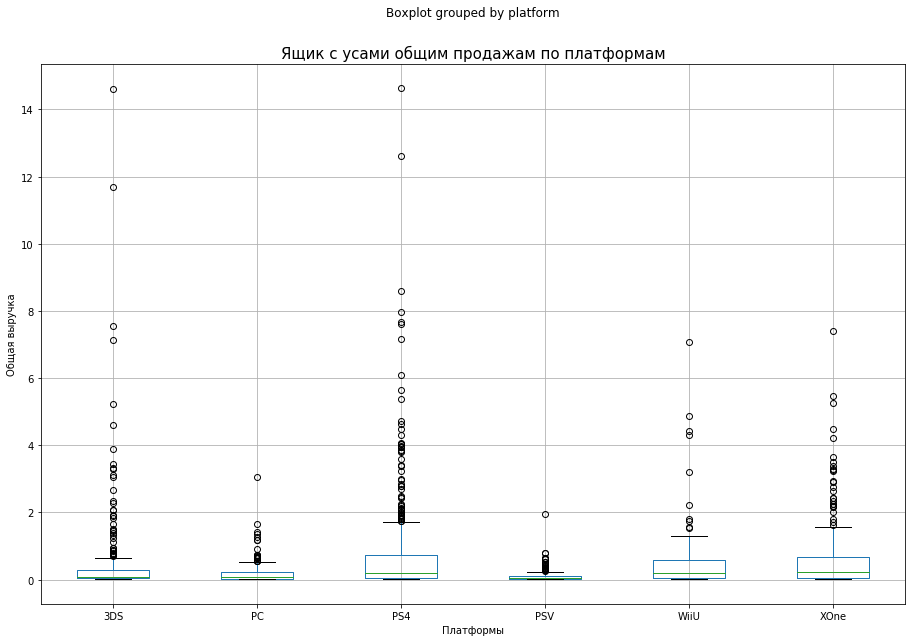

In [41]:
actual_games_sales.boxplot(column = 'total_sales', by = 'platform', figsize = (15, 10))

plt.title('Ящик с усами общим продажам по платформам', fontsize = 15)
plt.xlabel('Платформы', fontsize = 10)
plt.ylabel('Общая выручка', fontsize = 10)
plt.grid(True)
plt.show()

Глобальные продажи у игр по разным платформам различаются. Практически все самые прибыльные проекты находятся за пределами «усов». Есть как феноменально успешные, так и наоборот. Причем есть и зависимость от платформы. К примеру, у `PSV` за актуальный период продажи игр не очень успешные, но это связано уже с тем, что на момент актуального периода платформа пережила средний возраст. 

Топ рекордной выручки по одной игре заметен у `PS4` и у `3DS`. 

- **посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, затем построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами, сформулируем выводы**

Ранее мы выделили одними из самых прибыльных и популярных `PS4`, `XOne`, `WiiU` и `3DS`. Возьмем для проверки первую - `PS4`. Создадим отдельную таблицу, убрав пропуска в оценках:

In [42]:
games_ps4 = actual_games_sales.loc[(actual_games_sales['platform'] == 'PS4') & (actual_games_sales['critic_score'].notna()) 
                             & (actual_games_sales['user_score'].notna())]

Построим гистограммы и диаграммы рассеяния:

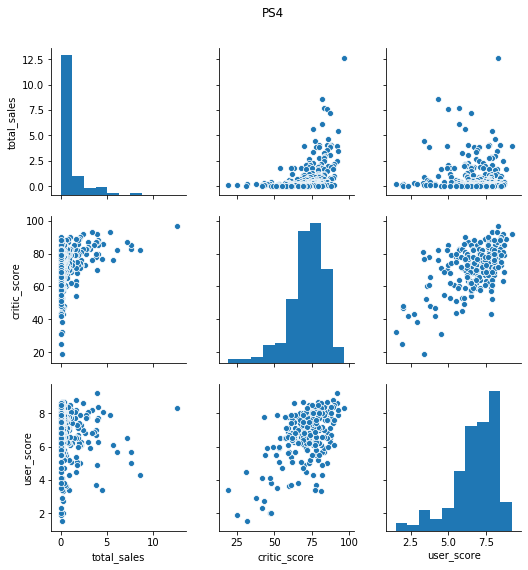

In [43]:
ps4 = sns.pairplot(games_ps4[['total_sales', 'critic_score', 'user_score']])
ps4.fig.suptitle('PS4', y = 1.05)
plt.show()

И тепловую карту с показателями корреляции:

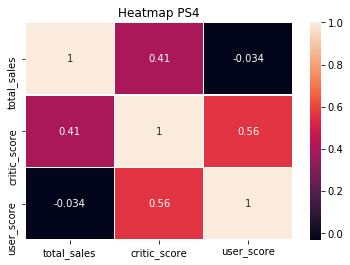

In [44]:
sns.heatmap(games_ps4[['total_sales', 'critic_score', 'user_score']].corr(), linewidths = .2, annot = True)
plt.title('Heatmap PS4')
plt.show()

Есть умеренная зависимость между оценками критиков и продажами. Как правило, у значительной части игр с хорошими отзывами большие продажи.

Оценки пользователей показывают почти нулевую корреляцию. Видимо из-за того, что пользователи в целом бывают разные, некоторые дотошнее относятся к игровым проектам, даже к очень успешным, поэтому можно наблюдать низкие оценки пользователей даже у них. 

При этом есть некоторая корреляция между оценками пользователей и критиков, то есть они зачастую совпадают во мнениях, либо почти совпадают. 

- **соотнесем выводы с продажами игр на других платформах**

Теперь же займемся `XOne`, `WiiU` и `3DS`, которые ранее оставили за бортом. Проделаем точно такие же действия, как для `PS4`:

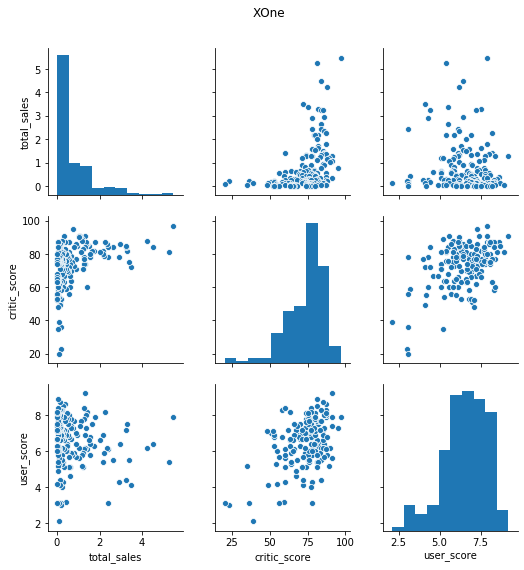

In [45]:
games_xone = actual_games_sales.loc[(actual_games_sales['platform'] == 'XOne') & (actual_games_sales['critic_score'].notna()) 
                             & (actual_games_sales['user_score'].notna())]

xone = sns.pairplot(games_xone[['total_sales', 'critic_score', 'user_score']])
xone.fig.suptitle('XOne', y = 1.05)
plt.show()

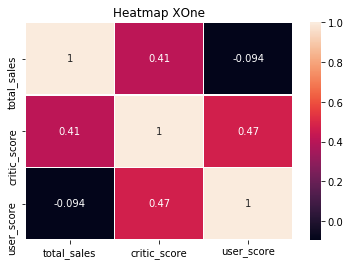

In [46]:
sns.heatmap(games_xone[['total_sales', 'critic_score', 'user_score']].corr(), linewidths = .2, annot = True)
plt.title('Heatmap XOne')
plt.show()

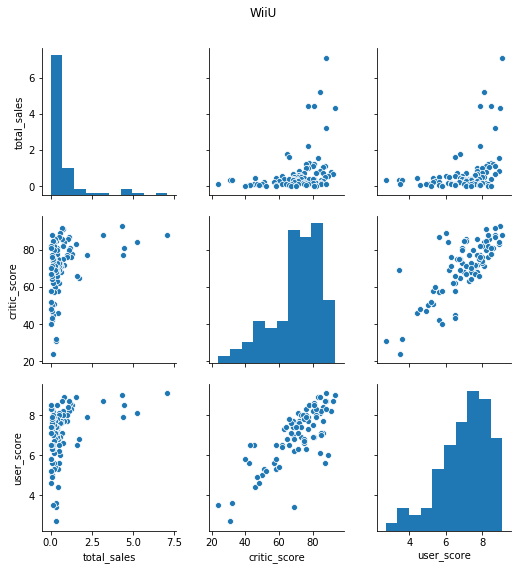

In [47]:
games_wiiu = actual_games.loc[(actual_games['platform'] == 'WiiU') & (actual_games['critic_score'].notna()) 
                             & (actual_games['user_score'].notna())]

wiiu = sns.pairplot(games_wiiu[['total_sales', 'critic_score', 'user_score']])
wiiu.fig.suptitle('WiiU', y = 1.05)
plt.show()

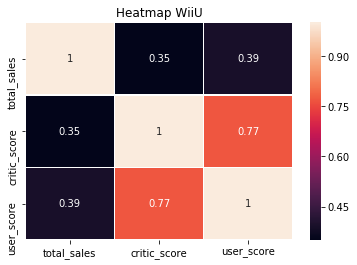

In [48]:
sns.heatmap(games_wiiu[['total_sales', 'critic_score', 'user_score']].corr(), linewidths = .2, annot = True)
plt.title('Heatmap WiiU')
plt.show()

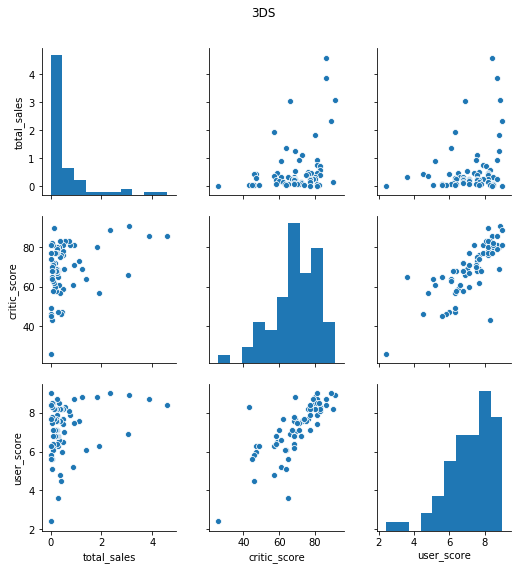

In [49]:
games_3ds = actual_games_sales.loc[(actual_games_sales['platform'] == '3DS') & (actual_games_sales['critic_score'].notna()) 
                             & (actual_games_sales['user_score'].notna())]

xone = sns.pairplot(games_3ds[['total_sales', 'critic_score', 'user_score']])
xone.fig.suptitle('3DS', y = 1.05)
plt.show()

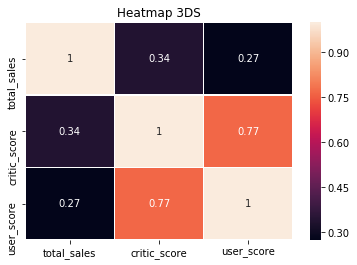

In [50]:
sns.heatmap(games_3ds[['total_sales', 'critic_score', 'user_score']].corr(), linewidths = .2, annot = True)
plt.title('Heatmap 3DS')
plt.show()

Показатели `PS4`, `XOne` и `3DS` очень схожи, коэффициенты корреляции почти одинаковые. У `3DS` же сильнее выражена зависимость продаж от оценок пользователей, а также высокая корреляция между оценками пользователей и критиков. Если заглянуть в таблицу и на диаграмму, то действительно оценки пользователей и критиков зачастую чуть ли не совпадают. 

- **посмотрим на общее распределение игр по жанрам, затем сделаем вывод о самых прибыльных жанрах и выясним, выделяются ли жанры с высокими и низкими продажами**

Построим табличку с жанрами и выручкой за актуальные года, отсортируем ее по убыванию в столбце с общей выручкой:

In [51]:
actual_games_sales.pivot_table(index = 'genre', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum'
                           ,margins = True, margins_name = 'total').sort_values(by = 'total', ascending = False)

year_of_release,2013,2014,2015,2016,total
genre,,,,,
total,146.14,245.04,237.94,124.64,753.76
Action,31.64,75.40,63.52,28.62,199.18
Shooter,20.60,44.24,62.71,38.16,165.71
Role-Playing,31.89,37.46,36.87,17.72,123.94
Sports,12.71,26.04,30.71,21.21,90.67
Misc,8.23,14.67,9.60,2.16,34.66
Platform,17.08,8.16,5.96,3.02,34.22
Racing,5.48,14.13,7.96,2.79,30.36
Fighting,2.02,13.27,7.08,4.32,26.69


Жанр `Action` был самым успешным, однако начиная с 2015 года его подкосило и выручка с этого жанра сильно упала, даже ниже жанра `Shooter` в 2016 году. Несмотря на то, что падение выручки наблюдается по каждому жанру, у остальных это выглядит менее резко на фоне резкого падения жанра Action. При этом Action все равно пока приносит больше всего выручки. У `Adventure` в целом наблюдается стабильность, в сравнении с другими жанрами.

В итоге самыми прибыльными за актуальный период являются `Action`, `Shooter`, `Role-Playing`, `Sports` и `Misc`. 

**Вывод по шагу:**

Мы провели исследователький анализ данных:
- выяснили сколько игр выпускалось в разные годы и то, что нет смысла брать данные по всем годам, ибо какие-то платформы давно прекратили свое существование и в целом рынок изменился;
- выяснили среднее время жизни платформ, а также общее количество продаж по годам и по платформам. Ознакомились с топом платформ по продажам;
- определили актуальный период для анализа, на основе той информации, которую получили ранее в этом шаге;
- выяснили, какие платформы лидируют по продажам за актуальный период, это `PS4`, `XOne` и `3DS`;
- определили потенциально прибыльные платформы для анализа, это `PS4`, `XOne`, `WiiU` и `3DS`;
- заметили, что рекорды по выручке за игру наблюдаются у `PS4` и `3DS`;
- выявили влияние оценок пользователей и критиков на продажи. Как правило, у значительной части игр с хорошими отзывами большие продажи;
- выяснили, что жанр `Action` оказался самым прибыльным за актуальный период, за ним следуют такие жанры, как `Shooter`, `Role-Playing`, `Sports` и `Misc`. 

### 4. Составление портрета пользователя каждого региона

Составим портрет пользователя каждого региона, а именно определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5) и опишем различия в долях продаж;
- cамые популярные жанры (топ-5) и поясним разницу;
- влияет ли рейтинг ESRB на продажи в отдельном регионе. 

Начнем также по порядку:

- **определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и опишем различия в долях продаж**

Подготовим данные для каждого региона:

In [52]:
na_games_actual = actual_games_sales.query('na_sales > 0')
eu_games_actual = actual_games_sales.query('eu_sales > 0')
jp_games_actual = actual_games_sales.query('jp_sales > 0')

Пропуски заменим на `no rating`:

In [53]:
na_games_actual['rating'] = na_games_actual['rating'].fillna('no rating')
eu_games_actual['rating'] = eu_games_actual['rating'].fillna('no rating')
jp_games_actual['rating'] = jp_games_actual['rating'].fillna('no rating')

Создадим таблицы с популярными платформами по каждому региону:

In [54]:
na_games_actual_platform = pd.pivot_table(na_games_actual, index = 'platform', values = 'na_sales',
                                          aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_games_actual_platform

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,38.20
WiiU,29.21
PC,11.11
PSV,5.04


Построим круговую диаграмму для наглядности:

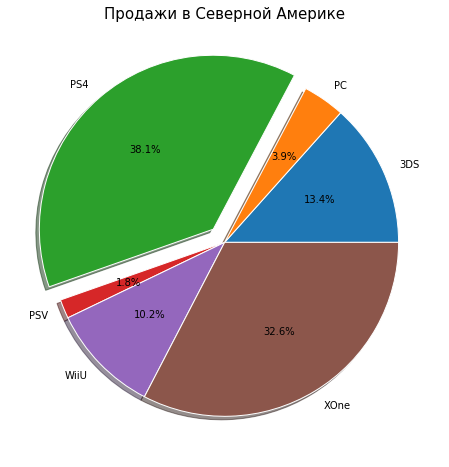

In [55]:
na_games_actual_platform = pd.pivot_table(na_games_actual, index = 'platform', values = 'na_sales',
                                          aggfunc = 'sum')
na_games_actual_platform = na_games_actual_platform.reset_index()
na_games_actual_platform['na_sales'] = na_games_actual_platform['na_sales'].astype(float)
explode = (0, 0, 0.1, 0, 0, 0)
fig = plt.figure(1, figsize = (8, 8))
plt.title('Продажи в Северной Америке', fontsize = 15)
plt.pie(na_games_actual_platform['na_sales'], labels = na_games_actual_platform['platform'], autopct = "%1.1f%%",
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode = explode, shadow = True)
plt.show()

Топ-5 для NA: `PS4`, `XOne`, `3DS`, `WiiU` и `PC`. `PS4` лидирует, так как это одна из самых продаваемых платформ в мире, при этом в Америке у Microsoft доминирующее положение, поэтому `XOne` дышит в затылок `PS4`, остальные платформы далеко позади. 

In [56]:
eu_games_actual_platform = pd.pivot_table(eu_games_actual, index = 'platform', values = 'eu_sales',
                                          aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_games_actual_platform

,eu_sales
platform,
PS4,141.09
XOne,51.59
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10


Построим круговую диаграмму для наглядности:

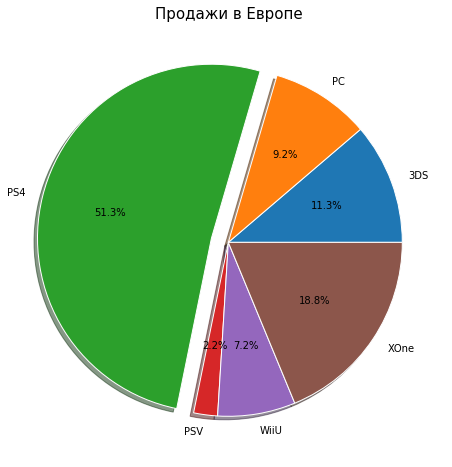

In [57]:
eu_games_actual_platform = pd.pivot_table(eu_games_actual, index = 'platform', values = 'eu_sales',
                                          aggfunc = 'sum')
eu_games_actual_platform = eu_games_actual_platform.reset_index()
eu_games_actual_platform['eu_sales'] = eu_games_actual_platform['eu_sales'].astype(float)
explode = (0, 0, 0.1, 0, 0, 0)
fig = plt.figure(1, figsize = (8, 8))
plt.title('Продажи в Европе', fontsize = 15)
plt.pie(eu_games_actual_platform['eu_sales'], labels = eu_games_actual_platform['platform'], autopct = "%1.1f%%",
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode = explode, shadow = True)
plt.show()

Топ-5 для EU: `PS4`, `XOne`, `3DS`, `PC` и `WiiU`. В Европе нет настолько крупного разработчика платформ, поэтому продажи строятся скорее просто из-за популярности платформ в остальных регионах. Здесь абсолютный лидер `PS4`. Можно заметить, что вне Америки `XOne` отстает от `PS4` уже очень существенно.

In [58]:
jp_games_actual_platform = pd.pivot_table(jp_games_actual, index = 'platform', values = 'jp_sales',
                                          aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_games_actual_platform

,jp_sales
platform,
3DS,67.81
PSV,18.59
PS4,15.96
WiiU,10.88
XOne,0.34


Построим круговую диаграмму для наглядности:

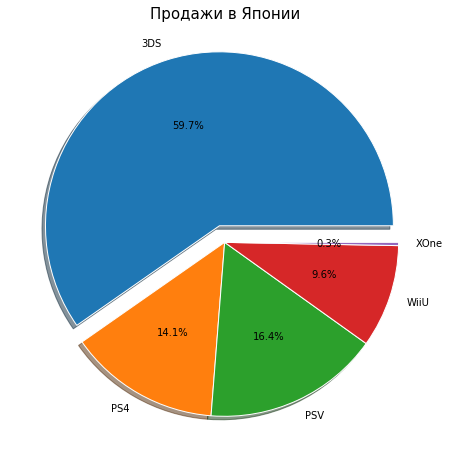

In [59]:
jp_games_actual_platform = pd.pivot_table(jp_games_actual, index = 'platform', values = 'jp_sales',
                                          aggfunc = 'sum')
jp_games_actual_platform = jp_games_actual_platform.reset_index()
jp_games_actual_platform['jp_sales'] = jp_games_actual_platform['jp_sales'].astype(float)
explode = (0.1, 0, 0, 0, 0)
fig = plt.figure(1, figsize = (8, 8))
plt.title('Продажи в Японии', fontsize = 15)
plt.pie(jp_games_actual_platform['jp_sales'], labels = jp_games_actual_platform['platform'], autopct = "%1.1f%%",
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode = explode, shadow = True)
plt.show()

Топ-5 для JP, как и во всей таблице: `3DS`, `PSV`, `PS4`, `WiiU` и `XOne`. Из рейтинга вообще выбыл `PC`. Первые четыре платформы японские, то есть в Японии лидируют именно их же платформы. `XOne` здесь будто мимо проходил и кто-то просто от скуки купил эту платформу, ибо показатель очень маленький. 

- **определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5) и поясним разницу**

Найдем популярные жанры для каждого региона:

In [60]:
na_games_actual_genres = pd.pivot_table(na_games_actual, index = 'genre', values = 'na_sales',
                                        aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_games_actual_genres

,na_sales
genre,
Shooter,75.37
Action,73.43
Role-Playing,37.92
Sports,37.09
Platform,14.18
Misc,12.69
Fighting,12.10
Racing,10.29
Adventure,4.57


Построим круговую диаграмму, на которой выделим топ-5 жанров по продажам:

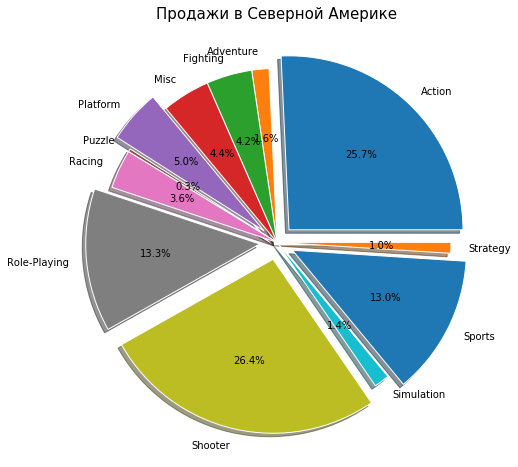

In [61]:
na_games_actual_genres = pd.pivot_table(na_games_actual, index = 'genre', values = 'na_sales',
                                        aggfunc = 'sum')
na_games_actual_genres = na_games_actual_genres.reset_index()
na_games_actual_genres['na_sales'] = na_games_actual_genres['na_sales'].astype(float)
explode = (0.1, 0, 0, 0, 0.1, 0, 0, 0.1, 0.1, 0, 0.1, 0)
fig = plt.figure(1, figsize = (8, 8))
plt.title('Продажи в Северной Америке', fontsize = 15)
plt.pie(na_games_actual_genres['na_sales'], labels = na_games_actual_genres['genre'], autopct = "%1.1f%%",
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode = explode, shadow = True)
plt.show()

Топ-5 для NA: `Shooter`, `Action`, `Role-Playing`, `Sports` и `Platform`.

In [62]:
eu_games_actual_genres = pd.pivot_table(eu_games_actual, index = 'genre', values = 'eu_sales',
                                        aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_games_actual_genres

,eu_sales
genre,
Action,73.96
Shooter,64.89
Sports,38.63
Role-Playing,32.00
Racing,15.18
Platform,12.16
Misc,10.61
Simulation,10.17
Fighting,6.58


Построим круговую диаграмму, на которой выделим топ-5 жанров по продажам:

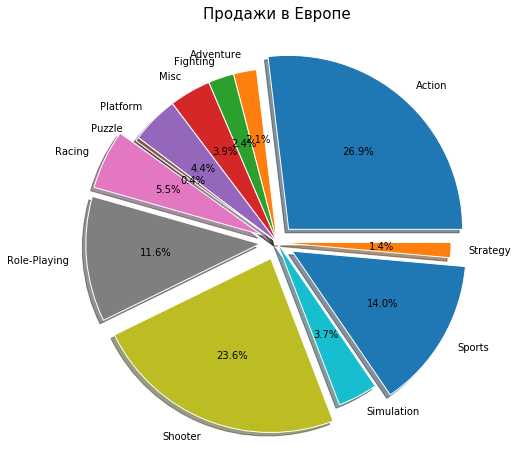

In [63]:
eu_games_actual_genres = pd.pivot_table(eu_games_actual, index = 'genre', values = 'eu_sales',
                                        aggfunc = 'sum')
eu_games_actual_genres = eu_games_actual_genres.reset_index()
eu_games_actual_genres['eu_sales'] = eu_games_actual_genres['eu_sales'].astype(float)
explode = (0.1, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0.1, 0)
fig = plt.figure(1, figsize = (8, 8))
plt.title('Продажи в Европе', fontsize = 15)
plt.pie(eu_games_actual_genres['eu_sales'], labels = eu_games_actual_genres['genre'], autopct = "%1.1f%%",
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode = explode, shadow = True)
plt.show()

Топ-5 для EU: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Racing`.

In [64]:
jp_games_actual_genres = pd.pivot_table(jp_games_actual, index = 'genre', values = 'jp_sales',
                                        aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_games_actual_genres

,jp_sales
genre,
Role-Playing,44.84
Action,29.87
Misc,8.27
Fighting,5.33
Platform,4.75
Shooter,4.56
Adventure,4.37
Simulation,4.29
Sports,3.05


Построим круговую диаграмму, на которой выделим топ-5 жанров по продажам:

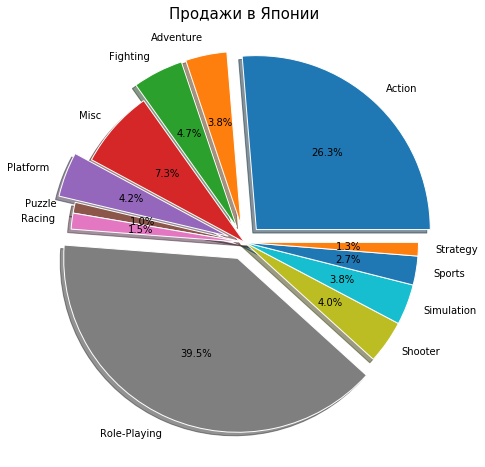

In [65]:
jp_games_actual_genres = pd.pivot_table(jp_games_actual, index = 'genre', values = 'jp_sales',
                                        aggfunc = 'sum')
jp_games_actual_genres = jp_games_actual_genres.reset_index()
jp_games_actual_genres['jp_sales'] = jp_games_actual_genres['jp_sales'].astype(float)
explode = (0.1, 0.1, 0.1, 0, 0.1, 0, 0, 0.1, 0, 0, 0, 0)
fig = plt.figure(1, figsize = (8, 8))
plt.title('Продажи в Японии', fontsize = 15)
plt.pie(jp_games_actual_genres['jp_sales'], labels = jp_games_actual_genres['genre'], autopct = "%1.1f%%",
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode = explode, shadow = True)
plt.show()

Топ-5 для JP: `Role-Playing`, `Action`, `Misc`, `Fighting` и `Platform`. 

Мы видим, что у американских и европейских игроков в целом схожие интересы по жанрам. У японских игроков уже есть свои особенности, им больше присущи игры, где нужно больше думать и еще им больше нравятся драки. При этом, как мы ранее выяснили, самый популярный жанр `Action` вошел в топ-5 по всем регионам.

- **определим влияет ли рейтинг ESRB на продажи в отдельном регионе**

Посмотрим на показатели продаж по регионам с разбивкой на рейтинги:

In [66]:
na_games_actual_rating = pd.pivot_table(na_games_actual, index = 'rating', values = 'na_sales',
                                        aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_games_actual_rating

,na_sales
rating,
M,97.05
no rating,68.68
E,52.37
T,35.07
E10+,32.25


In [67]:
eu_games_actual_rating = pd.pivot_table(eu_games_actual, index = 'rating', values = 'eu_sales',
                                        aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_games_actual_rating

,eu_sales
rating,
M,94.51
no rating,63.54
E,58.00
T,32.60
E10+,26.30


In [68]:
jp_games_actual_rating = pd.pivot_table(jp_games_actual, index = 'rating', values = 'jp_sales',
                                        aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_games_actual_rating

,jp_sales
rating,
no rating,72.97
T,13.52
E,13.26
M,8.17
E10+,5.66


Безусловно, рейтинг ESRB влияет на продажи в каждом регионе. 

В Америке и Европе снова похожие показатели. У них лидируют игры с маркером «M» («Mature») — «Для взрослых», которые приносят больше всего выручки, остальные маркеры тоже примерно совпадают. При этом в каждой таблице в лидерах игры без рейтинга, причем имеющие не хилые объемы продаж. В Японии они вообще лидируют с огромным отрывом от остальных маркеров. К сожалению, игры без рейтинга не имеют какого-то определенного рейтинга, если смотреть точечно, маркеры разнятся от игры к игре, закономерности нет, поэтому это просто огромное количество перемешанных отсутствующих данных. Вручную их заполнить не предоставляется возможным, как и сделать какие-то конкретные выводы. 

К сожалению, пропуски затронули бОльшую часть игр в Японии, поэтому остальные рейтинги показывают малый объем продаж. Однозначный вывод сделать не получится, так как мы не знаем, какой именно маркер будет лидировать, если бы мы могли заполнить все пропуски, будем ориентироваться на то, что сейчас лидирует рейтинг «T» («Teen») — «Подросткам». 



**Вывод по шагу:**

Мы проанализировали показатели продаж по разным регионам, а именно по платформам, жанрам и возрасту. Теперь можем составить примерный портрет игрока. 

`NA` игрок - в возрасте от 17 лет, использует платформы `PS4` или `XOne`, играет преимущественно в игры жанра шутер и экшн.

`EU` игрок - в возрасте от 17 лет, использует платформу `PS4` или `XOne`, играет преимущественно в игры жанра экшн и шутер. 

`JP` игрок - в возрасте от 13 лет, использует платформу `3DS` или `PSV`, играет преимущественно в игры жанра ролевая игра или экшн.

### 5. Проверка гипотез

Приступим к проверке гипотез:
- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- cредние пользовательские рейтинги жанров Action и Sports разные.

#### 5.1 Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формируем гипотезы:

- H0 — cредние пользовательские рейтинги платформ Xbox One и PC равны;
- H1 — cредние пользовательские рейтинги платформ Xbox One и PC не равны.

Для начала заменим пропуски в нужном столбце на нули:

In [69]:
actual_games_sales['user_score'] = actual_games_sales['user_score'].fillna(0)

Затем проверим, так ли на самом деле, как сказано в нулевой гипотезе:

In [70]:
print('Средний пользовательский рейтинг XOne = ', round(actual_games_sales.query('platform == "XOne"')['user_score'].mean(), 2))
print('Средний пользовательский рейтинг PC = ', round(actual_games_sales.query('platform == "PC"')['user_score'].mean(), 2))

Средний пользовательский рейтинг XOne =  4.81
Средний пользовательский рейтинг PC =  5.14


Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам есть специальный метод, его и будем использовать `ttest_ind`:

In [71]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(actual_games_sales.query('platform == "XOne"')['user_score'],
                       actual_games_sales.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.24875948537089854
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Рейтинги в целом похожи друг на друга, что и подтверждает нулевая гипотеза. Отвергнуть ее не удалось.

#### 5.1 Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные

Формируем гипотезы:

- H0 — cредние пользовательские рейтинги жанров Action и Sports одинаковы;
- H1 — cредние пользовательские рейтинги жанров Action и Sports разные.

Проверим, так ли на самом деле, как сказано в нулевой гипотезе:

In [72]:
print('Средний пользовательский рейтинг жанра Action = ',
      round(actual_games_sales.query('genre == "Action"')['user_score'].mean(), 2))
print('Средний пользовательский рейтинг жанра Sports = ',
      round(actual_games_sales.query('genre == "Sports"')['user_score'].mean(), 2))

Средний пользовательский рейтинг жанра Action =  3.46
Средний пользовательский рейтинг жанра Sports =  4.43


Уберем пропуски из столбца:

In [73]:
actual_games_sales['user_score'] = actual_games_sales['user_score'].dropna()

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам есть специальный метод, его и будем использовать `ttest_ind`:

In [75]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(actual_games_sales.query('genre == "Action"')['user_score'],
                       actual_games_sales.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.004131221919543495
Отвергаем нулевую гипотезу


**Вывод:**

В этом случае наоборот получилось отвергнуть нулевую гипотезу. Это значит, что средние пользовательские рейтинги жанров Action и Sports не равны, что подтвердили расчеты в начале шага. 

**Вывод по шагу:**

Мы проверили обе гипотезы. Выяснили, что cредние пользовательские рейтинги платформ Xbox One и PC скорее одинаковые, а вот cредние пользовательские рейтинги жанров Action и Sports тоже скорее одинаковые. 

### 6. Общий вывод

**Вывод:**

Мы провели объемную работу с полученным файлом и ознакомились с данными в нем. Затем двигались по следующему пути:
- нашли и исправили ошибки в данных, а также заменили типы данных на правильные;
- посчитали и добавили в таблицу суммарные продажи по регионам;
- провели исследовательский анализ данных, ответив на ряд вопросов;
- составили портрет пользователя каждого региона;
- в заключении проверили две гипотезы.

Каждый шаг сопровождали подробным выводом, который поможет заказчику без кода разобраться в результатах исследования. 

Можем подытожить следующим:
- необходимо учитывать, что в разных регионах понадобится разная стратегия, так как предпочтения у игроков могут различаться, что на примере нам показала Япония;
- продавать игры следует для платформ `PS4`, `XOne` и `3DS`;
- в жанрах `Action`, `Shooter` и `Role-Playing`;
- в возрастной категории `M` и `E`;
- также стоит обращать внимание на комментарии критиков, так как от их оценки немного зависит и успешность игр. 